In [48]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('..\Data-processed\crop_recommendation.csv')

In [50]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,78,40,37,20.879744,82.002744,6.502985,202.935536,rice
1,96,39,43,21.770462,80.319644,7.038096,226.655537,rice
2,74,44,37,23.004459,82.320763,7.840207,263.964248,rice
3,71,42,44,26.491096,80.158363,6.980401,242.864034,rice
4,98,51,37,20.130175,81.604873,7.628473,262.717340,rice


In [51]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,81,20,30,26.774637,66.413269,6.780064,177.774507,coffee
2196,98,32,28,27.417112,56.636362,6.086922,127.924610,coffee
2197,83,37,32,24.131797,67.225123,6.362608,173.322839,coffee
2198,80,30,29,26.272418,52.127394,6.758793,127.175293,coffee
2199,112,22,25,23.603016,60.396475,6.779833,140.937041,coffee


In [52]:
df.size

17600

In [53]:
df.shape

(2200, 8)

In [54]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [55]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [56]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [57]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

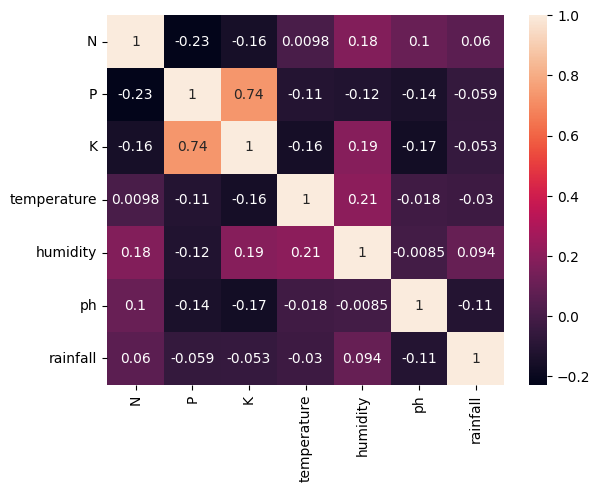

In [58]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Seperating features and target label

In [59]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [60]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [61]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  93.4090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.76      1.00      0.86        16
    chickpea       1.00      0.90      0.95        21
     coconut       1.00      0.86      0.92        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.70      1.00      0.82        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.88      1.00      0.94        23
       maize       1.00      0.71      0.83        21
       mango       0.90      1.00      0.95        26
   mothbeans       1.00      0.79      0.88        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [65]:
score

array([0.93636364, 0.90681818, 0.92045455, 0.91818182, 0.93181818])

### Saving trained Decision Tree model

In [66]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [68]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99545455, 0.99772727, 0.98863636, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [69]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [70]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.95      0.95      0.95        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.86      0.84        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
 

In [71]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98409091, 0.98863636, 0.98409091, 0.98636364, 0.98181818])

In [72]:
#Saving trained SVM model

In [73]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.83      0.94      0.88        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.89      0.85      0.87        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      0.93      0.96        14
      lentil       0.81      0.96      0.88        23
       maize       0.86      0.86      0.86        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.79      0.88        19
    mungbean       1.00      0.92      0.96        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [75]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.96590909, 0.95227273, 0.95454545, 0.95227273, 0.94772727])

### Saving trained Logistic Regression model

In [76]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.96      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [78]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 0.99318182, 0.99318182, 0.99318182, 0.99090909])

### Saving trained Random Forest model

In [79]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
import xgboost as xgb



# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable in your training data
Ytrain_encoded = label_encoder.fit_transform(Ytrain)

# Create an XGBoost classifier and fit it with the encoded target variable
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Predict using the trained model
predicted_values = XB.predict(Xtest)

# Inverse transform the predicted numerical labels back to their original string form
predicted_labels = label_encoder.inverse_transform(predicted_values)

# Calculate accuracy and print the results
x = metrics.accuracy_score(Ytest, predicted_values)
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest, predicted_labels))


XGBoost's Accuracy is:  0.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.89      0.89        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29

In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
target_encoded = label_encoder.fit_transform(target)

# Create an XGBoost classifier
XB = xgb.XGBClassifier()

# Cross-validation score
scores = cross_val_score(XB, features, target_encoded, cv=5)
print("Cross-Validation Scores:", scores)

# Optionally, you can print the mean and standard deviation of the scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Scores: [0.99318182 0.98863636 0.99545455 0.99318182 0.98863636]
Mean Accuracy: 0.9918181818181818
Standard Deviation: 0.002727272727272726


### Saving trained XGBoost model

In [82]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

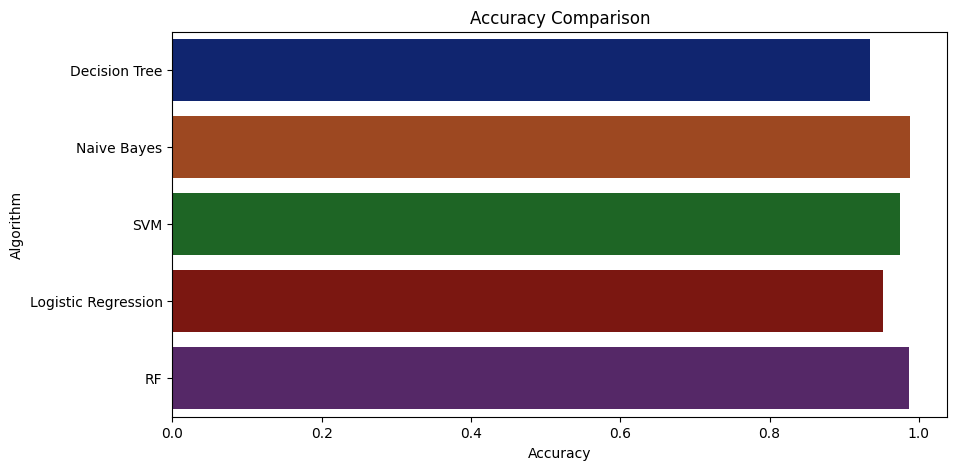

In [83]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [84]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9340909090909091
Naive Bayes --> 0.9886363636363636
SVM --> 0.975
Logistic Regression --> 0.9522727272727273
RF --> 0.9863636363636363


## Making a prediction

In [85]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [86]:
data = np.array([[50, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['mango']
